<a href="https://colab.research.google.com/github/FaustoFLES/Programacion-Analitica/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?


# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


**Ejercicio 1**

In [11]:
from sklearn.datasets import load_wine
wine = load_wine()
display(wine_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
import pandas as pd

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

display(wine_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
alcohol_feature = wine_df['alcohol']
display(alcohol_feature.head())

,alcohol
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24


In [7]:
from scipy.stats import shapiro

shapiro_test = shapiro(alcohol_feature)
print("Shapiro-Wilk Test Results (Alcohol Feature):")
print(f"Statistic: {shapiro_test.statistic:.4f}")
print(f"P-value: {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test Results (Alcohol Feature):
Statistic: 0.9818
P-value: 0.0200


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as MinMaxScaler expects a 2D array
alcohol_feature_reshaped = alcohol_feature.values.reshape(-1, 1)

# Apply Min-Max Normalization
scaler = MinMaxScaler()
normalized_alcohol = scaler.fit_transform(alcohol_feature_reshaped)

# Convert back to a pandas Series for easier display
normalized_alcohol_series = pd.Series(normalized_alcohol.flatten(), name='alcohol_normalized')

display(normalized_alcohol_series.head())

,alcohol_normalized
0,0.842105
1,0.571053
2,0.560526
3,0.878947
4,0.581579


In [9]:
from scipy.stats import shapiro

shapiro_test_normalized = shapiro(normalized_alcohol_series)
print("Shapiro-Wilk Test Results (Normalized Alcohol Feature):")
print(f"Statistic: {shapiro_test_normalized.statistic:.4f}")
print(f"P-value: {shapiro_test_normalized.pvalue:.4f}")

Shapiro-Wilk Test Results (Normalized Alcohol Feature):
Statistic: 0.9818
P-value: 0.0200


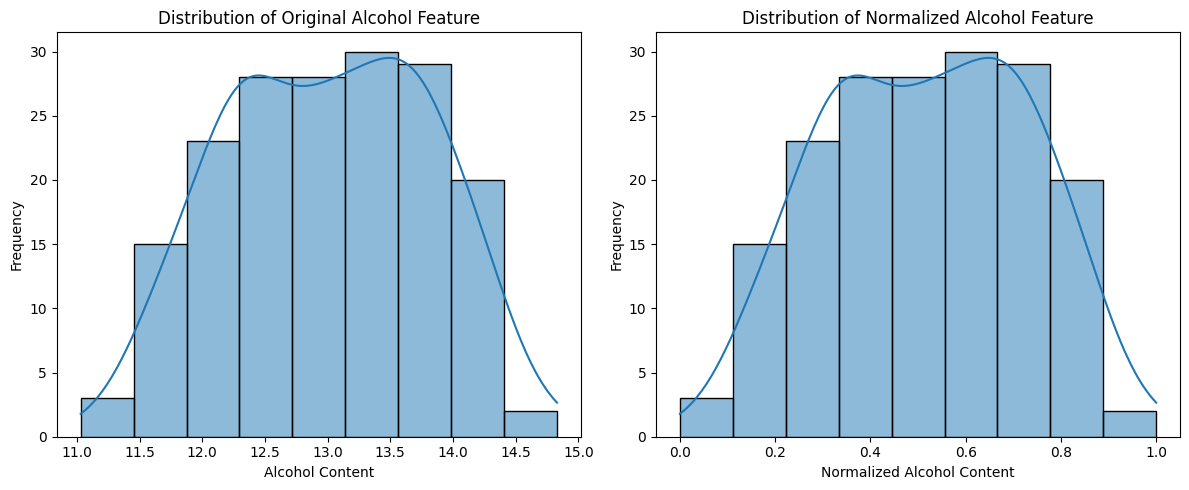

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram for original data
plt.subplot(1, 2, 1)
sns.histplot(alcohol_feature, kde=True)
plt.title('Distribution of Original Alcohol Feature')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')

# Histogram for normalized data
plt.subplot(1, 2, 2)
sns.histplot(normalized_alcohol_series, kde=True)
plt.title('Distribution of Normalized Alcohol Feature')
plt.xlabel('Normalized Alcohol Content')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Preguntas:

¿Cómo afectó la normalización Min-Max a la distribución de los datos?
La escala de normalizacion min man creo rangos entre 0 y 1 pero no cambio la forma de la distribucion, se puede ver en los histogramas que los valores son iguales solo que en diferentes escalas

¿Qué interpretas del p-valor antes y después de la normalización?
Debido a que obtuvimos un valor p de 0.02 por el examen de shapiro, por lo tanto como el valor p es menor a 0.05 rechazamos la hipotesis nula sobre la normalizacion de los datos, por lo tanto podemos decir que las caracteriticas del alcohol no siguen una distribucion normal.


**Ejercicio 2**

In [12]:
malic_acid_feature = wine_df['malic_acid']
display(malic_acid_feature.head())

,malic_acid
0,1.71
1,1.78
2,2.36
3,1.95
4,2.59


In [13]:
from scipy.stats import shapiro

shapiro_test_malic_acid = shapiro(malic_acid_feature)
print("Shapiro-Wilk Test Results (Malic Acid Feature):")
print(f"Statistic: {shapiro_test_malic_acid.statistic:.4f}")
print(f"P-value: {shapiro_test_malic_acid.pvalue:.4f}")

Shapiro-Wilk Test Results (Malic Acid Feature):
Statistic: 0.8888
P-value: 0.0000


In [14]:
from sklearn.preprocessing import StandardScaler

# Reshape the data as StandardScaler expects a 2D array
malic_acid_feature_reshaped = malic_acid_feature.values.reshape(-1, 1)

# Apply Z-Score Normalization
scaler = StandardScaler()
normalized_malic_acid = scaler.fit_transform(malic_acid_feature_reshaped)

# Convert back to a pandas Series for easier display
normalized_malic_acid_series = pd.Series(normalized_malic_acid.flatten(), name='malic_acid_normalized')

display(normalized_malic_acid_series.head())

,malic_acid_normalized
0,-0.562250
1,-0.499413
2,0.021231
3,-0.346811
4,0.227694


In [15]:
from scipy.stats import shapiro

shapiro_test_normalized_malic_acid = shapiro(normalized_malic_acid_series)
print("Shapiro-Wilk Test Results (Normalized Malic Acid Feature):")
print(f"Statistic: {shapiro_test_normalized_malic_acid.statistic:.4f}")
print(f"P-value: {shapiro_test_normalized_malic_acid.pvalue:.4f}")

Shapiro-Wilk Test Results (Normalized Malic Acid Feature):
Statistic: 0.8888
P-value: 0.0000


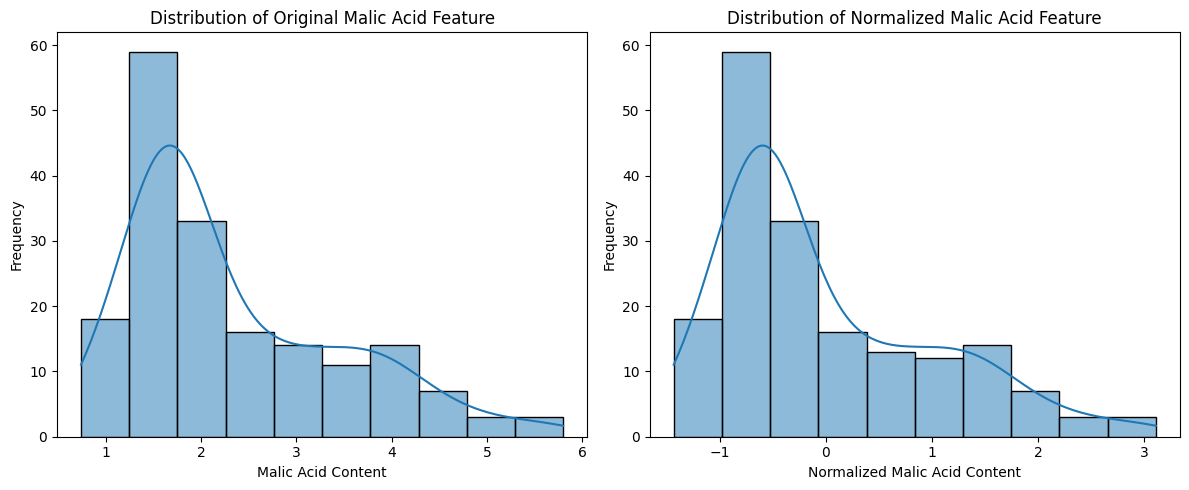

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram for original data
plt.subplot(1, 2, 1)
sns.histplot(malic_acid_feature, kde=True)
plt.title('Distribution of Original Malic Acid Feature')
plt.xlabel('Malic Acid Content')
plt.ylabel('Frequency')

# Histogram for normalized data
plt.subplot(1, 2, 2)
sns.histplot(normalized_malic_acid_series, kde=True)
plt.title('Distribution of Normalized Malic Acid Feature')
plt.xlabel('Normalized Malic Acid Content')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Responder las preguntas siguientes.

1. ¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
La escala del eje X es diferente.

2. ¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?
Que la normalizacion de Z-score puede estandarizar datos en una escala similar haciendo el analisis mas facil.

**Ejercicio 3: Transformación Logarítmica Instrucciones**

In [18]:
import numpy as np

# Generate a random dataset of integers between 0 and 100 (e.g., 100 random numbers)
random_data = np.random.randint(0, 101, 100)
display(random_data[:10]) # Display the first 10 values

array([25, 16, 66, 80, 77, 85, 84, 54, 34, 89])

In [19]:
# Apply logarithmic transformation (add a small constant to handle 0 values)
log_transformed_data = np.log(random_data + 1e-9) # Adding a small constant

display(log_transformed_data[:10]) # Display the first 10 transformed values

array([3.21887582, 2.77258872, 4.18965474, 4.38202663, 4.34380542,
       4.44265126, 4.4308168 , 3.98898405, 3.52636052, 4.48863637])

In [20]:
from scipy.stats import shapiro

# Shapiro-Wilk Test on Original Data
shapiro_test_original = shapiro(random_data)
print("Shapiro-Wilk Test Results (Original Data):")
print(f"Statistic: {shapiro_test_original.statistic:.4f}")
print(f"P-value: {shapiro_test_original.pvalue:.4f}")
print("-" * 30) # Separator

# Shapiro-Wilk Test on Log-Transformed Data
shapiro_test_log = shapiro(log_transformed_data)
print("Shapiro-Wilk Test Results (Log-Transformed Data):")
print(f"Statistic: {shapiro_test_log.statistic:.4f}")
print(f"P-value: {shapiro_test_log.pvalue:.4f}")

Shapiro-Wilk Test Results (Original Data):
Statistic: 0.9703
P-value: 0.0234
------------------------------
Shapiro-Wilk Test Results (Log-Transformed Data):
Statistic: 0.3029
P-value: 0.0000


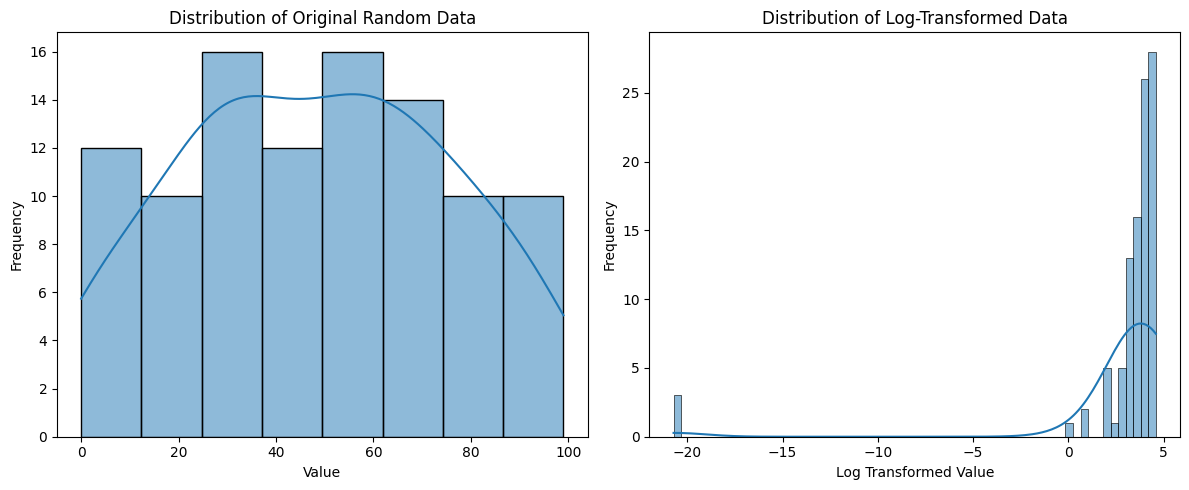

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram for original data
plt.subplot(1, 2, 1)
sns.histplot(random_data, kde=True)
plt.title('Distribution of Original Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True)
plt.title('Distribution of Log-Transformed Data')
plt.xlabel('Log Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Responder las preguntas siguientes.

1. ¿Cómo afectó la transformación logarítmica a la distribución de los datos?
La tranformacion logaritmica comprimio los valores grandes y alargo los valores pequeños, eso proboco que la distribucion cambiara pasando de un histograma relativamente uniforme a uno donde claramente no hay uniformidad


2. ¿Qué interpretas del p-valor antes y después de la transformación logarítmica?
Primero el valor p fue de 0.0234 lo cual rechaza la hipotesis nula y despues de la tranformacion el valor p fue 0.0 lo que significa que ambos graficos no siguen una distribucion normal a pesar de que el primero, visualmente hablando, parece que si la puede seguir.

**Ejercicio 4: Transformación Raíz Cuadrada Instrucciones**

In [22]:
import numpy as np

# Generate a random dataset of integers between 0 and 100 (e.g., 100 random numbers)
random_data_sqrt = np.random.randint(0, 101, 100)
display(random_data_sqrt[:10]) # Display the first 10 values

array([ 4, 95, 83, 91, 15, 76, 44, 92, 46, 66])

In [23]:
# Apply square root transformation
sqrt_transformed_data = np.sqrt(random_data_sqrt)

display(sqrt_transformed_data[:10]) # Display the first 10 transformed values

array([2.        , 9.74679434, 9.11043358, 9.53939201, 3.87298335,
       8.71779789, 6.63324958, 9.59166305, 6.78232998, 8.1240384 ])

In [24]:
from scipy.stats import shapiro

# Shapiro-Wilk Test on Original Data
shapiro_test_original_sqrt = shapiro(random_data_sqrt)
print("Shapiro-Wilk Test Results (Original Data):")
print(f"Statistic: {shapiro_test_original_sqrt.statistic:.4f}")
print(f"P-value: {shapiro_test_original_sqrt.pvalue:.4f}")
print("-" * 30) # Separator

# Shapiro-Wilk Test on Square Root Transformed Data
shapiro_test_sqrt = shapiro(sqrt_transformed_data)
print("Shapiro-Wilk Test Results (Square Root Transformed Data):")
print(f"Statistic: {shapiro_test_sqrt.statistic:.4f}")
print(f"P-value: {shapiro_test_sqrt.pvalue:.4f}")

Shapiro-Wilk Test Results (Original Data):
Statistic: 0.9493
P-value: 0.0007
------------------------------
Shapiro-Wilk Test Results (Square Root Transformed Data):
Statistic: 0.9257
P-value: 0.0000


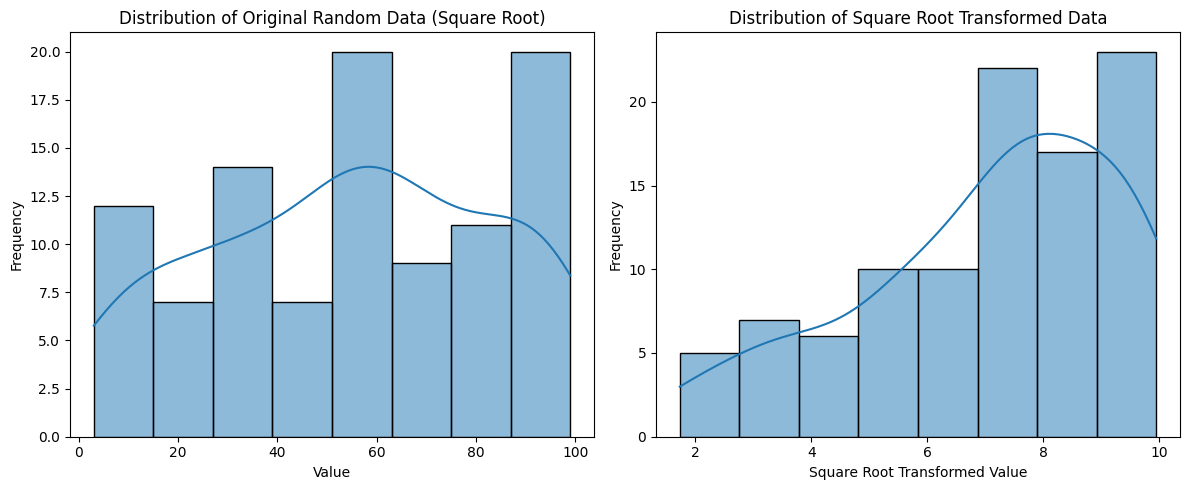

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram for original data
plt.subplot(1, 2, 1)
sns.histplot(random_data_sqrt, kde=True)
plt.title('Distribution of Original Random Data (Square Root)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for square root transformed data
plt.subplot(1, 2, 2)
sns.histplot(sqrt_transformed_data, kde=True)
plt.title('Distribution of Square Root Transformed Data')
plt.xlabel('Square Root Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Responder las preguntas siguientes.

1. ¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
Los datos grandes se comprimieron mas que los pqeueños dando como resultado una forma mas simetrica despues de las tranformacion


2. ¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?
Reduce mas los valores extremos de los datos en comparacion a los datos medios o pequeños

**Ejercicio 5: Transformación Box-Cox Instrucciones**

In [26]:
import numpy as np

# Generate a random dataset of positive numbers (e.g., 100 random numbers) for Box-Cox
# Box-Cox requires positive data, so generating integers > 0
random_data_boxcox = np.random.randint(1, 101, 100)
display(random_data_boxcox[:10]) # Display the first 10 values

array([83, 89, 91, 48, 56, 68, 28, 92,  8, 51])

In [27]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
# boxcox returns the transformed data and the optimal lambda value
boxcox_transformed_data, lambda_value = boxcox(random_data_boxcox)

print(f"Optimal lambda value: {lambda_value:.4f}")
display(boxcox_transformed_data[:10]) # Display the first 10 transformed values

Optimal lambda value: 0.6925


array([29.35601323, 30.88126882, 31.38259269, 19.63485181, 22.0095265 ,
       25.38478786, 13.06850388, 31.63198226,  4.65094894, 20.53864558])

In [28]:
from scipy.stats import shapiro

# Shapiro-Wilk Test on Original Data
shapiro_test_original_boxcox = shapiro(random_data_boxcox)
print("Shapiro-Wilk Test Results (Original Data):")
print(f"Statistic: {shapiro_test_original_boxcox.statistic:.4f}")
print(f"P-value: {shapiro_test_original_boxcox.pvalue:.4f}")
print("-" * 30) # Separator

# Shapiro-Wilk Test on Box-Cox Transformed Data
shapiro_test_boxcox = shapiro(boxcox_transformed_data)
print("Shapiro-Wilk Test Results (Box-Cox Transformed Data):")
print(f"Statistic: {shapiro_test_boxcox.statistic:.4f}")
print(f"P-value: {shapiro_test_boxcox.pvalue:.4f}")

Shapiro-Wilk Test Results (Original Data):
Statistic: 0.9566
P-value: 0.0023
------------------------------
Shapiro-Wilk Test Results (Box-Cox Transformed Data):
Statistic: 0.9611
P-value: 0.0048


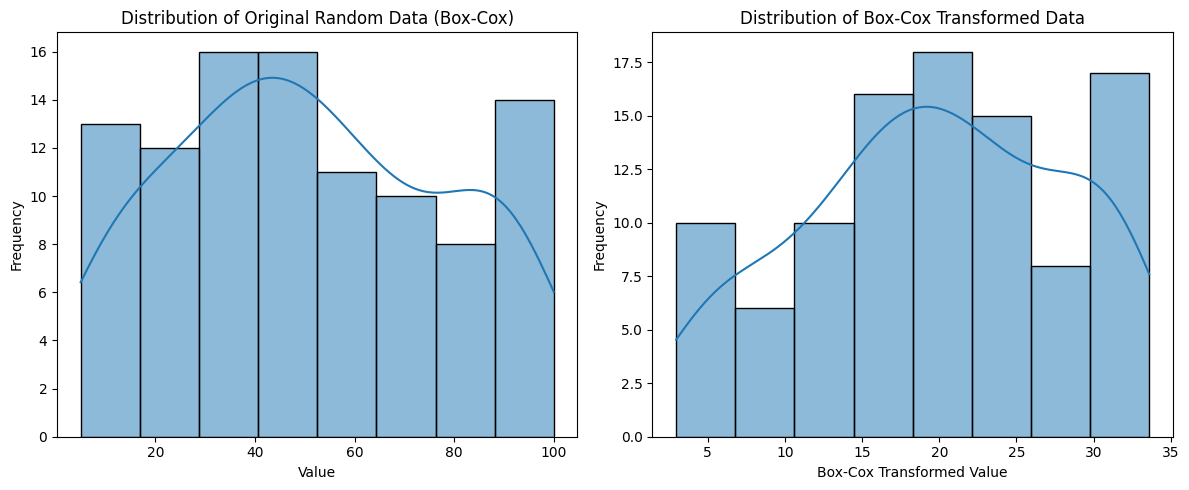

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram for original data
plt.subplot(1, 2, 1)
sns.histplot(random_data_boxcox, kde=True)
plt.title('Distribution of Original Random Data (Box-Cox)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for Box-Cox transformed data
plt.subplot(1, 2, 2)
sns.histplot(boxcox_transformed_data, kde=True)
plt.title('Distribution of Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Responder las preguntas siguientes.

1. ¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
La tranformacion Box-Cox esta diseñada para transformar la informacion en una distribucion normal



2. ¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?
Esto se puede ver en el valor p debido a que aumento despues de hacer la tranformacion